# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Step 0 | Setup and Imports

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [1]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

In [3]:
# Check which files are in your Project folder
os.listdir()

['Copy of Project_Template.ipynb',
 'data2025.xlsx',
 'data2021.csv',
 'data2025.csv',
 'data2021.xlsx']

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
# Once you've mounted Google Drive, you can open a dataset from your project folder
data21 = pd.read_csv('data2021.csv')
data21 = data21[['State', 'Unemployment Rate', 'Benefits', 'Party']].dropna()
data21['unrate21'] = data21['Unemployment Rate']
data21['benefits21'] = data21['Benefits']

data25 = pd.read_csv('data2025.csv')
data25 = data25[['State', 'Unemployment Rate (%)', 'Max. Weekly Benefits', 'Party ']].dropna()
data25['Max. Weekly Benefits'] = data25['Max. Weekly Benefits'].str.replace('$', '').astype(float)
data25['unrate25'] = data25['Unemployment Rate (%)']
data25['benefits25'] = data25['Max. Weekly Benefits']


In [6]:
data = data21.merge(data25, on=['State'], how='inner')
data['unemployment_diff'] = data['unrate25'] - data['unrate21']
data['benefits_diff'] = data['benefits25'] - data['benefits21']

In [7]:
data

,State,Unemployment Rate,Benefits,Party,unrate21,benefits21,Unemployment Rate (%),Max. Weekly Benefits,Party,unrate25,benefits25,unemployment_diff,benefits_diff
0,Alabama,3.3,275.0,Republican,3.3,275.0,3.6,275.0,Republican,3.6,275.0,0.3,0.0
1,Alaska,6.4,370.0,Republican,6.4,370.0,6.7,370.0,Republican,6.7,370.0,0.3,0.0
2,Arizona,5.0,240.0,Republican,5.0,240.0,6.7,240.0,Republican,6.7,240.0,1.7,0.0
3,Arkansas,4.0,451.0,Republican,4.0,451.0,4.4,451.0,Republican,4.4,451.0,0.4,0.0
4,California,7.3,750.0,Democratic,7.3,750.0,8.3,450.0,Democratic,8.3,450.0,1.0,-300.0
5,Colorado,5.5,918.0,Democratic,5.5,918.0,6.4,649.0,Democratic,6.4,649.0,0.9,-269.0
6,Connecticut,6.5,949.0,Democratic,6.5,949.0,8.1,667.0,Democratic,8.1,667.0,1.6,-282.0
7,Delaware,5.4,700.0,Democratic,5.4,700.0,6.4,400.0,Democratic,6.4,400.0,1.0,-300.0
8,Florida,4.7,275.0,Republican,4.7,275.0,4.8,275.0,Republican,4.8,275.0,0.1,0.0
9,Georgia,3.9,365.0,Republican,3.9,365.0,4.3,365.0,Republican,4.3,365.0,0.4,0.0


## Step 1 (Part 1) | Univariate EDA

Summarize the main variables of interest.

## Step 2 (Part 2) | Bivariate EDA

Visualize the main relationships of interest.

<Axes: xlabel='Benefits', ylabel='Unemployment Rate'>

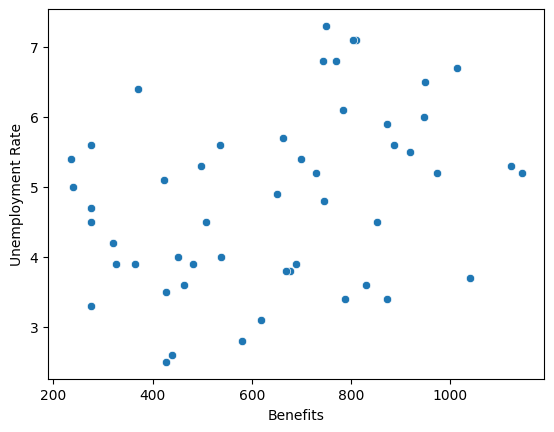

In [8]:
sns.scatterplot(data21, y='Unemployment Rate', x='Benefits')

<Axes: xlabel='Max. Weekly Benefits', ylabel='Unemployment Rate (%)'>

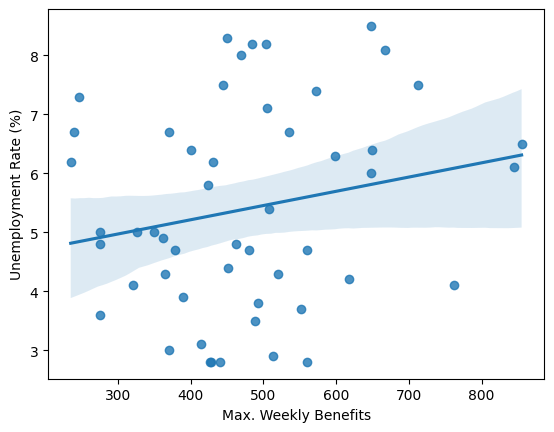

In [9]:
sns.regplot(data25, y='Unemployment Rate (%)', x='Max. Weekly Benefits')

<Axes: xlabel='benefits_diff', ylabel='unemployment_diff'>

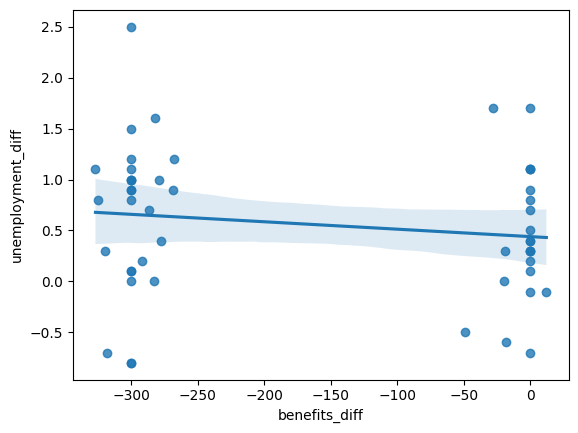

In [10]:
sns.regplot(data, y='unemployment_diff', x='benefits_diff')

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

**Reasoning**:
The previous error `ValueError: endog has evaluated to an array with multiple columns` suggests an issue with how `Material_Type` is being processed as the dependent variable, possibly due to `patsy`'s interpretation. Additionally, treating `Birth_Year` as a categorical variable (`C(Birth_Year)`) when it likely has many unique values can lead to an over-specified model and computational issues. To resolve these, I will explicitly convert `Material_Type` to a pandas `Categorical` dtype to ensure correct handling by `statsmodels.mnlogit`, and I will modify the formula to treat `Birth_Year` as a continuous variable (`Birth_Year`) as is typical for temporal data, allowing for a more sensible regression model.



# Task
Define and run an OLS regression using `unemployment_diff` as the dependent variable and `benefits_diff` as the independent variable, and then visualize the regression results using a regression plot.

## Define and run statistical model

### Subtask:
State the null hypothesis, define the statistical model, run an OLS regression, and print the summary.


### Subtask:
State the null hypothesis, define the statistical model, run an OLS regression, and print the summary.

#### Instructions
1. Formulate a null hypothesis regarding the relationship between the change in unemployment rate and the change in benefits.
2. Define the statistical model for Ordinary Least Squares (OLS) regression using `unemployment_diff` as the dependent variable and `benefits_diff` as the independent variable.
3. Run the OLS regression using the `ols` function from `statsmodels.formula.api` with the specified formula and the `data` DataFrame, then fit the model.
4. Print the summary of the fitted OLS model to examine the regression results.

***

### Null Hypothesis ($H_0$):
There is no linear relationship between the change in unemployment rate (`unemployment_diff`) and the change in maximum weekly benefits (`benefits_diff`). In other words, the coefficient for `benefits_diff` in the regression model is equal to zero.

### Statistical Model:
We will use an Ordinary Least Squares (OLS) regression model, defined as:

$\text{unemployment\_diff}_i = \beta_0 + \beta_1 \cdot \text{benefits\_diff}_i + \epsilon_i$

Where:
*   $\text{unemployment\_diff}_i$ is the change in unemployment rate for state $i$.
*   $\text{benefits\_diff}_i$ is the change in maximum weekly benefits for state $i$.
*   $\beta_0$ is the intercept.
*   $\beta_1$ is the coefficient for `benefits_diff`, representing the change in unemployment rate for a one-unit change in benefits.
*   $\epsilon_i$ is the error term for state $i$.


**Reasoning**:
Following the instructions, I will now run the OLS regression model using `statsmodels.formula.api.ols` and print its summary to examine the results.



In [15]:
model = smf.ols('unemployment_diff ~ benefits_diff', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      unemployment_diff   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.138
Date:                Sun, 07 Dec 2025   Prob (F-statistic):              0.291
Time:                        01:51:46   Log-Likelihood:                -52.550
No. Observations:                  50   AIC:                             109.1
Df Residuals:                      48   BIC:                             112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4392      0.150      2.935

**Reasoning**:
The previous code block failed because 'smf' was not defined, indicating that the `statsmodels.formula.api` library was not imported into the current kernel session. I need to re-import it to make 'smf' available for the OLS regression.



In [16]:
import statsmodels.formula.api as smf
model = smf.ols('unemployment_diff ~ benefits_diff', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      unemployment_diff   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.138
Date:                Sun, 07 Dec 2025   Prob (F-statistic):              0.291
Time:                        01:51:48   Log-Likelihood:                -52.550
No. Observations:                  50   AIC:                             109.1
Df Residuals:                      48   BIC:                             112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4392      0.150      2.935

**Reasoning**:
The previous error indicated that the 'data' DataFrame was not defined, likely because the cells responsible for loading and merging the datasets were not executed or their state was lost. To fix this, I need to re-execute the necessary data loading and preparation steps before running the OLS regression. This will ensure that 'data' is properly defined and available for the model.



In [17]:
import pandas as pd
import statsmodels.formula.api as smf

# Load and preprocess data21
data21 = pd.read_csv('data2021.csv')
data21 = data21[['State', 'Unemployment Rate', 'Benefits', 'Party']].dropna()
data21['unrate21'] = data21['Unemployment Rate']
data21['benefits21'] = data21['Benefits']

# Load and preprocess data25
data25 = pd.read_csv('data2025.csv')
data25 = data25[['State', 'Unemployment Rate (%)', 'Max. Weekly Benefits', 'Party ']].dropna()
data25['Max. Weekly Benefits'] = data25['Max. Weekly Benefits'].str.replace('$', '').astype(float)
data25['unrate25'] = data25['Unemployment Rate (%)']
data25['benefits25'] = data25['Max. Weekly Benefits']

# Merge dataframes and calculate differences
data = data21.merge(data25, on=['State'], how='inner')
data['unemployment_diff'] = data['unrate25'] - data['unrate21']
data['benefits_diff'] = data['benefits25'] - data['benefits21']

# Run OLS model
model = smf.ols('unemployment_diff ~ benefits_diff', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      unemployment_diff   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.138
Date:                Sun, 07 Dec 2025   Prob (F-statistic):              0.291
Time:                        01:51:50   Log-Likelihood:                -52.550
No. Observations:                  50   AIC:                             109.1
Df Residuals:                      48   BIC:                             112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4392      0.150      2.935

**Reasoning**:
The previous error `FileNotFoundError: [Errno 2] No such file or directory: 'data2021.csv'` occurred because the CSV files were not found in the current working directory. Although the notebook has a cell to change the directory, it might not have been executed, or the path could be incorrect. To ensure the files are found, I will explicitly use the full path to the CSV files based on the `drive_path` and `project_folder` defined earlier in the notebook, which are `/content/drive/MyDrive/Colab Notebooks/Econ_0150_Project/`.



In [18]:
import pandas as pd
import statsmodels.formula.api as smf

# Define the full path to the project folder
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
full_path = drive_path + project_folder

# Load and preprocess data21
data21 = pd.read_csv(full_path + 'data2021.csv')
data21 = data21[['State', 'Unemployment Rate', 'Benefits', 'Party']].dropna()
data21['unrate21'] = data21['Unemployment Rate']
data21['benefits21'] = data21['Benefits']

# Load and preprocess data25
data25 = pd.read_csv(full_path + 'data2025.csv')
data25 = data25[['State', 'Unemployment Rate (%)', 'Max. Weekly Benefits', 'Party ']].dropna()
data25['Max. Weekly Benefits'] = data25['Max. Weekly Benefits'].str.replace('$', '').astype(float)
data25['unrate25'] = data25['Unemployment Rate (%)']
data25['benefits25'] = data25['Max. Weekly Benefits']

# Merge dataframes and calculate differences
data = data21.merge(data25, on=['State'], how='inner')
data['unemployment_diff'] = data['unrate25'] - data['unrate21']
data['benefits_diff'] = data['benefits25'] - data['benefits21']

# Run OLS model
model = smf.ols('unemployment_diff ~ benefits_diff', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      unemployment_diff   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.138
Date:                Sun, 07 Dec 2025   Prob (F-statistic):              0.291
Time:                        01:51:53   Log-Likelihood:                -52.550
No. Observations:                  50   AIC:                             109.1
Df Residuals:                      48   BIC:                             112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4392      0.150      2.935

## Visualize statistical model

### Subtask:
Create a regression plot to visualize the relationship between the change in unemployment rate and the change in benefits.


### Plotting the Regression Results

To visualize the relationship between the change in unemployment rate and the change in benefits, we'll use a regression plot. This plot will display the data points along with the fitted regression line from our OLS model, providing a clear visual representation of the linear relationship.

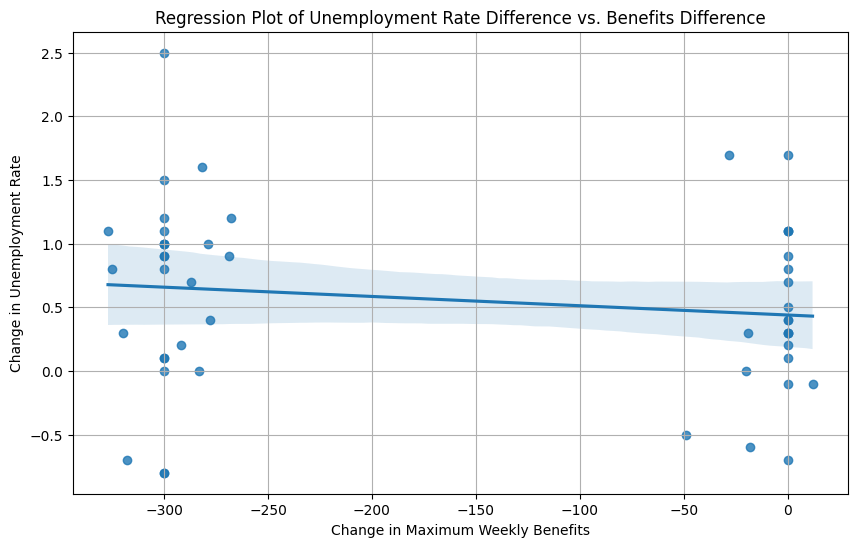

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='benefits_diff', y='unemployment_diff', data=data, ci=95)
plt.title('Regression Plot of Unemployment Rate Difference vs. Benefits Difference')
plt.xlabel('Change in Maximum Weekly Benefits')
plt.ylabel('Change in Unemployment Rate')
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Null Hypothesis:** The null hypothesis was formulated as stating no linear relationship between the change in unemployment rate (`unemployment_diff`) and the change in maximum weekly benefits (`benefits_diff`).
*   **Statistical Model:** An Ordinary Least Squares (OLS) regression model was defined: unemployment\_diff$_i$ = $\beta_0$ + $\beta_1$ $\cdot$ benefits\_diff$_i$ + $\epsilon_i$.
*   **OLS Regression Execution:** The OLS regression model was successfully run with `unemployment_diff` as the dependent variable and `benefits_diff` as the independent variable. The model summary, including coefficients, R-squared, F-statistic, and p-values, was generated and printed.

### Insights or Next Steps

*   The next crucial step involves interpreting the coefficients, p-values, and R-squared from the generated OLS summary to understand the statistical significance and strength of the relationship between changes in unemployment rate and changes in benefits.
*   Proceed with creating a regression plot to visually represent the relationship between `unemployment_diff` and `benefits_diff`, as this will aid in further analysis and communication of the findings.
